In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_som.som import SOM
from sklearn.metrics import accuracy_score
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import os

## In questo file andiamo ad effettuare il clustering con KMEANS per il dataframe contenente tutti i file csv

In [2]:
with open('pickle/scaled_total_document.pickle', 'rb') as handle:
    df = pickle.load(handle)

In [3]:
#contiamo il numero di elementi per ogni label

df_prova = df.groupby(['Label'])['Label'].count()

df_prova=df_prova.to_frame()
print(df_prova)
df_prova.set_index('Label')
df_prova=df_prova.rename(columns={'Label':'Count'})

         Label
Label         
0      7313104
1       576191


In [4]:
#prendiamo due feature alla volta

feature_1 = 'Init Fwd Win Byts'
feature_2 = 'Init Bwd Win Byts'


df = df[[feature_1, feature_2,'Label']]

In [5]:
malign = df[df.Label == 1]
benign = df[df.Label == 0]

print("Benign: ", len(benign), "Malign: ", len(malign))

Benign:  7313104 Malign:  576191


In [6]:
#bilanciamento del dataset
balanced_d = pd.concat([malign, benign.sample(len(malign))])
bal_x = balanced_d.iloc[:,:-1]
bal_y = balanced_d.iloc[:,-1:]
balanced_d.shape

(1152382, 3)

(1152382, 3)


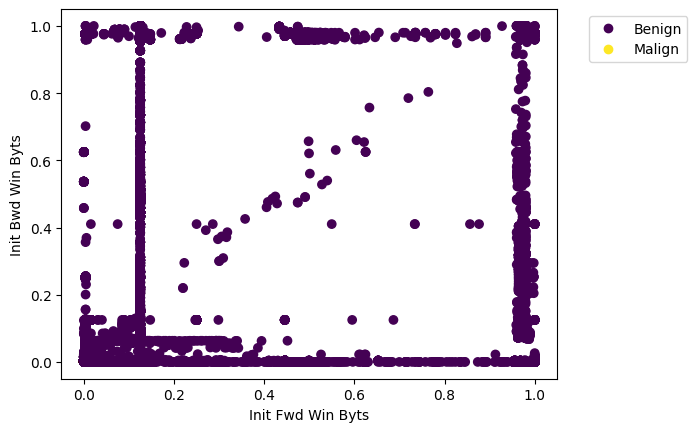

In [7]:
print(balanced_d.shape)

scatter_plot= plt.scatter(balanced_d[feature_1],balanced_d[feature_2],c=balanced_d['Label'])

scatter_plot

# Aggiungi la legenda
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.legend(handles=scatter_plot.legend_elements()[0], labels=['Benign', 'Malign'], bbox_to_anchor=(1.05, 1), loc='upper left')


title = ("Scatter " + str(feature_1) + " - " + str(feature_2))

feature_name = title.replace('/','_')

if not os.path.exists('image/'+'clustering_totale'):

    os.makedirs('image/'+'clustering_totale')

plt.savefig('image/'+'clustering_totale' +'/'+str(feature_name)+'.png',bbox_inches='tight')

In [8]:
n_clusters = len(balanced_d['Label'].unique())  # numero di cluster

In [9]:
# Eseguiamo il clustering con Kmeans

km = KMeans(n_clusters=n_clusters)
y_pred = km.fit_predict(bal_x)

# Associazione del cluster i-esimo con la classe i-esima
cluster_class_mapping = {}
for i in range(n_clusters):
    cluster_samples = bal_x[y_pred == i]
    cluster_classes = bal_y[y_pred == i]
    unique_classes, class_counts = np.unique(cluster_classes, return_counts=True)
    dominant_class = unique_classes[np.argmax(class_counts)]
    cluster_class_mapping[i] = dominant_class

/home/spalazzi/anaconda3/envs/cyber/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
difference = pd.DataFrame(data=[],columns=['num_cluster','num_class'])
# Stampiamo l'associazione del cluster con la classe
for i in range(n_clusters):
    if(i != cluster_class_mapping[i]):

        new_row = pd.Series({'num_cluster': i, 'num_class': cluster_class_mapping[i]})
        difference = pd.concat([difference,new_row.to_frame().T],ignore_index=True)

In [11]:
# se il numero del cluster e la classe non coincidono, andiamo ad effettuare uno switch

indici = []

for a in difference['num_cluster']:
    indici.append([
    index for index in range(len(y_pred))
    if y_pred[index] == a
])

for ind,true_value in zip(indici,difference['num_class']):
    for a in ind:
        y_pred[a] = true_value

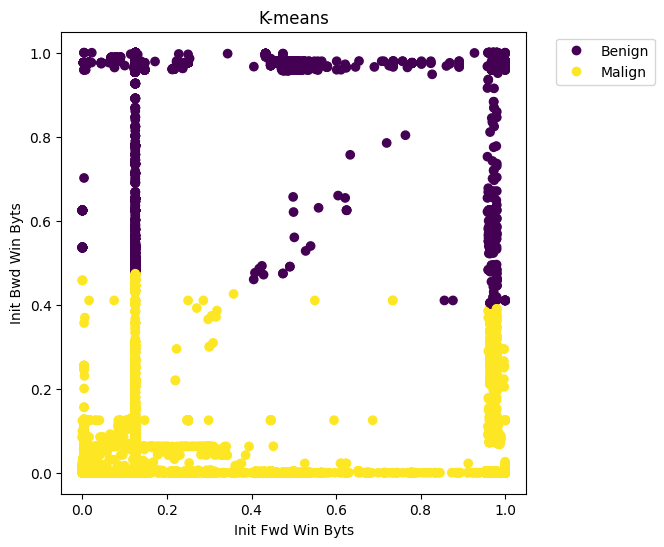

In [12]:
# Plot dei risultati

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
scatter = axs.scatter(bal_x[feature_1], bal_x[feature_2], c=y_pred)
scatter
axs.set_title("K-means")
plt.xlabel(feature_1)
plt.ylabel(feature_2)

# Aggiungi la legenda
plt.legend(handles=scatter.legend_elements()[0], labels=['Benign', 'Malign'], bbox_to_anchor=(1.05, 1), loc='upper left')

title = ("K-means " + str(feature_1) + " " + str(feature_2))
feature_name = title.replace('/','_')
if not os.path.exists('image/clustering_totale/'):
    os.makedirs('image/clustering_totale/')
plt.savefig('image/clustering_totale/'+str(feature_name)+'.png',bbox_inches='tight')

plt.show()

In [13]:
accuracy_kmeans = str(accuracy_score(y_pred,bal_y))
precision_kmeans = str(precision_score(y_pred,bal_y,average='macro'))
recall_kmeans = str(recall_score(y_pred,bal_y,average='macro'))

# accuratezza kmeans
print("accuratezza" + accuracy_kmeans)
# precision kmeans
print("precision" + precision_kmeans)
# recall kemans
print("recall" + recall_kmeans)


metriche = pd.DataFrame({
    'metriche': ["accuracy","precision","recall"],
    'valori': [accuracy_kmeans,precision_kmeans,recall_kmeans]
})

if not os.path.exists('metriche/'):
    os.makedirs('metriche/')

metriche.to_csv('metriche/metriche_kmeans_totale.csv',index=False)

accuratezza0.5798042662936422
precision0.5798042662936422
recall0.7716813291374998


In [14]:
# Eseguiamo il clustering

n_clusters = len(balanced_d['Label'].unique())  # numero di cluster

y_som = SOM(m=1, n=2, dim=2)

y_som.fit(bal_x.values)

predictions = y_som.predict(bal_x.values)

# Associazione del cluster i-esimo con la classe i-esima
cluster_class_mapping = {}
for i in range(n_clusters):
    cluster_samples = bal_x[predictions == i]
    cluster_classes = bal_y[predictions == i]
    unique_classes, class_counts = np.unique(cluster_classes, return_counts=True)
    dominant_class = unique_classes[np.argmax(class_counts)]
    cluster_class_mapping[i] = dominant_class

In [15]:
difference = pd.DataFrame(data=[],columns=['num_cluster','num_class'])

# Stampiamo l'associazione del cluster con la classe

for i in range(n_clusters):
    if(i != cluster_class_mapping[i]):

        new_row = pd.Series({'num_cluster': i, 'num_class': cluster_class_mapping[i]})
        difference = pd.concat([difference,new_row.to_frame().T],ignore_index=True)

In [16]:
indici = []

for a in difference['num_cluster']:
    indici.append([
    index for index in range(len(predictions))
    if predictions[index] == a
])

for ind,true_value in zip(indici,difference['num_class']):
    for a in ind:
        predictions[a] = true_value

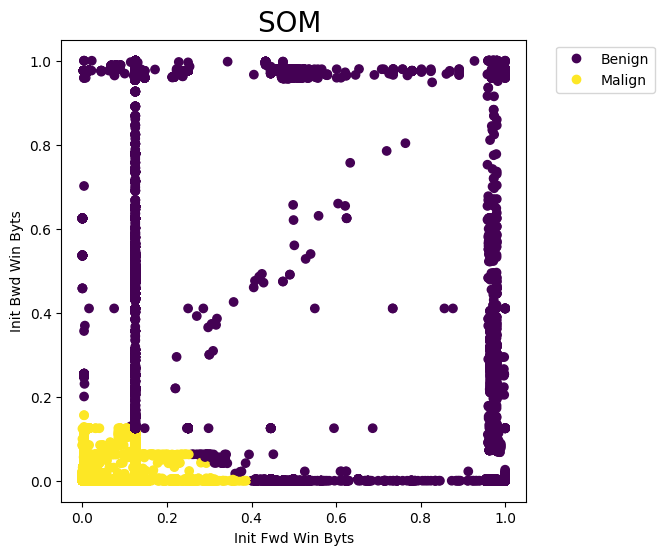

In [17]:
# Plot dei risultati

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
scatter_plot = axs.scatter(bal_x[feature_1], bal_x[feature_2], c=predictions)
scatter_plot

plt.title('SOM ', fontsize = 20)
plt.xlabel(feature_1)
plt.ylabel(feature_2)

# Aggiungi la legenda
plt.legend(handles=scatter_plot.legend_elements()[0], labels=['Benign', 'Malign'], bbox_to_anchor=(1.05, 1), loc='upper left')

title = ("SOM " + str(feature_1) + " - " + str(feature_2))
feature_name = title.replace('/','_')
if not os.path.exists('image/clustering_totale/'):
    os.makedirs('image/clustering_totale/')
plt.savefig('image/clustering_totale/'+str(feature_name)+'.png',bbox_inches='tight')

plt.show()

In [18]:
accuracy_som = str(accuracy_score(predictions,bal_y))
precision_som = str(precision_score(predictions,bal_y,average='macro'))
recall_som = str(recall_score(predictions,bal_y,average='macro'))

# accuratezza som
print("accuratezza " + accuracy_som)
# precision som
print("precision " + precision_som)
# recall som
print("recall " + recall_som)

metriche = pd.DataFrame({
    'metriche': ["accuracy","precision","recall"],
    'valori': [accuracy_som,precision_som,recall_som]
})

if not os.path.exists('metriche/'):
    os.makedirs('metriche/')

metriche.to_csv('metriche/metriche_som_totale.csv',index=False)

accuratezza 0.6072482909313057
precision 0.6072482909313057
recall 0.7800330679409131
